In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens3000/ml-1m/users.dat
/kaggle/input/movielens3000/ml-1m/ratings.dat
/kaggle/input/movielens3000/ml-1m/README
/kaggle/input/movielens3000/ml-1m/movies.dat


/tmp/ipykernel_13/1229163428.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import pandas as pd
import numpy as np

# Load data into dataframes with Latin-1 encoding
movies_df = pd.read_csv('/kaggle/input/movielens3000/ml-1m/movies.dat', sep='::', engine='python', header=None, encoding='ISO-8859-1')
ratings_df = pd.read_csv('/kaggle/input/movielens3000/ml-1m/ratings.dat', sep='::', engine='python', header=None, encoding='ISO-8859-1')
users_df = pd.read_csv('/kaggle/input/movielens3000/ml-1m/users.dat', sep='::', engine='python', header=None, encoding='ISO-8859-1')

In [3]:
movies_columns = ['MovieID', 'Title', 'Genres']
ratings_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
users_columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

# Assign header columns
movies_df.columns = movies_columns
ratings_df.columns = ratings_columns
users_df.columns = users_columns

movies_df.columns, ratings_df.columns, users_df.columns
# Display the first few rows of each dataframe
# print("Movies data:")
# print(movies_df.head())

# print("\nRatings data:")
# print(ratings_df.head())

# print("\nUsers data:")
# print(users_df.head())

(Index(['MovieID', 'Title', 'Genres'], dtype='object'),
 Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object'),
 Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object'))

In [4]:
movieswithgenre = movies_df.drop("Title", axis=1)

In [5]:
movieswithgenre

,MovieID,Genres
0,1,Animation|Children's|Comedy
1,2,Adventure|Children's|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama
4,5,Comedy
...,...,...
3878,3948,Comedy
3879,3949,Drama
3880,3950,Drama
3881,3951,Drama


In [6]:
# Split the 'Genres' column into individual genres
splitgenres = movieswithgenre['Genres'].str.split('|', expand=True)

# Get unique genres
unique_genres = splitgenres.stack().unique()

# Create new columns for each genre and mark them with 1 if the movie belongs to that genre
for genre in unique_genres:
    movieswithgenre[genre] = splitgenres.apply(lambda row: 1 if genre in row.values else 0, axis=1)

# Drop the original 'Genres' column
movieswithgenre.drop('Genres', axis=1, inplace=True)

In [7]:
movieswithgenre

,MovieID,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3880,3950,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3881,3951,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
movieswithgenre.loc[movieswithgenre['MovieID']==1193]

,MovieID,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
1176,1193,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [10]:
# Merge ratings_df with movieswithgenre on 'MovieID'
df = pd.merge(ratings_df, movieswithgenre, on='MovieID')

In [11]:
df

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,1193,5,978300760,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,914,3,978301968,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,3408,4,978300275,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,5,956704887,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1000206,6040,562,5,956704746,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,4,956715648,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
noveldf = df

In [13]:
noveldf['Timestamp'] = pd.to_datetime(noveldf['Timestamp'], unit='s')

# Extract the year from the datetime format and create a new column 'Year'
noveldf['Year'] = noveldf['Timestamp'].dt.year

In [14]:
noveldf

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
0,1,1193,5,2000-12-31 22:12:40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
1,1,661,3,2000-12-31 22:35:09,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2000
2,1,914,3,2000-12-31 22:32:48,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2000
3,1,3408,4,2000-12-31 22:04:35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
4,1,2355,5,2001-01-06 23:38:11,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
1000205,6040,1094,5,2000-04-25 23:21:27,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2000
1000206,6040,562,5,2000-04-25 23:19:06,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
1000207,6040,1096,4,2000-04-26 02:20:48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2000


In [15]:
sortednovel = noveldf.sort_values(by='Year', ascending=False)

In [16]:
sortednovel

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
769460,4582,2318,4,2003-01-21 19:26:43,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2003
785746,4697,3081,5,2003-02-21 01:33:24,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,2003
171803,1088,3171,4,2003-01-26 09:09:24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2003
562601,3462,3893,4,2003-02-27 13:14:14,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,2003
785734,4697,3005,5,2003-02-21 01:29:22,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362447,2114,1356,3,2000-11-19 16:12:22,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,2000
362449,2114,2161,3,2000-11-24 22:10:27,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2000
362450,2114,2167,3,2000-11-19 16:23:42,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2000
362452,2114,1370,4,2000-11-19 16:11:00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2000


In [17]:
# Define the exponential decay function
def exponential_decay(year):
    # Define decay rate
    decay_rate = 0.05  # Adjust this value as needed
    
    # Calculate the exponential decay
    value = np.exp(-decay_rate * (2003 - year))
    
    return value

# Apply the exponential decay function to the 'Year' column
sortednovel['Year'] = sortednovel['Year'].apply(exponential_decay)

In [18]:
sortednovel

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
769460,4582,2318,4,2003-01-21 19:26:43,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
785746,4697,3081,5,2003-02-21 01:33:24,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1.000000
171803,1088,3171,4,2003-01-26 09:09:24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
562601,3462,3893,4,2003-02-27 13:14:14,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1.000000
785734,4697,3005,5,2003-02-21 01:29:22,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362447,2114,1356,3,2000-11-19 16:12:22,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.860708
362449,2114,2161,3,2000-11-24 22:10:27,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0.860708
362450,2114,2167,3,2000-11-19 16:23:42,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.860708
362452,2114,1370,4,2000-11-19 16:11:00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.860708


In [19]:
sortednovel['Rating'] = sortednovel['Rating'] * sortednovel['Year']

In [20]:
sortednovel

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
769460,4582,2318,4.000000,2003-01-21 19:26:43,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
785746,4697,3081,5.000000,2003-02-21 01:33:24,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1.000000
171803,1088,3171,4.000000,2003-01-26 09:09:24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
562601,3462,3893,4.000000,2003-02-27 13:14:14,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1.000000
785734,4697,3005,5.000000,2003-02-21 01:29:22,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362447,2114,1356,2.582124,2000-11-19 16:12:22,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.860708
362449,2114,2161,2.582124,2000-11-24 22:10:27,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0.860708
362450,2114,2167,2.582124,2000-11-19 16:23:42,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.860708
362452,2114,1370,3.442832,2000-11-19 16:11:00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.860708


In [21]:
# Drop the 'Year' column from the DataFrame
sortednovel.drop('Year', axis=1, inplace=True)

In [22]:
sortednovel

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
769460,4582,2318,4.000000,2003-01-21 19:26:43,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
785746,4697,3081,5.000000,2003-02-21 01:33:24,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
171803,1088,3171,4.000000,2003-01-26 09:09:24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
562601,3462,3893,4.000000,2003-02-27 13:14:14,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
785734,4697,3005,5.000000,2003-02-21 01:29:22,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362447,2114,1356,2.582124,2000-11-19 16:12:22,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
362449,2114,2161,2.582124,2000-11-24 22:10:27,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
362450,2114,2167,2.582124,2000-11-19 16:23:42,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
362452,2114,1370,3.442832,2000-11-19 16:11:00,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
filtered_df = df[df['UserID'] == 1]

In [24]:
filtered_df

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Year
0,1,1193,5,2000-12-31 22:12:40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
1,1,661,3,2000-12-31 22:35:09,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2000
2,1,914,3,2000-12-31 22:32:48,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2000
3,1,3408,4,2000-12-31 22:04:35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
4,1,2355,5,2001-01-06 23:38:11,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2001
5,1,1197,3,2000-12-31 22:37:48,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,2000
6,1,1287,5,2000-12-31 22:33:59,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2000
7,1,2804,5,2000-12-31 22:11:59,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
8,1,594,4,2000-12-31 22:37:48,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2000
9,1,919,4,2000-12-31 22:22:48,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2000


In [25]:
sortednovel.describe()

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,...,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.102380e+00,2000-10-22 19:41:35.404665088,4.328395e-02,7.217092e-02,3.565055e-01,1.339250e-01,3.629341e-02,1.474922e-01,...,7.952438e-02,1.896404e-01,7.637004e-02,1.572611e-01,7.908347e-03,6.851268e-02,4.152432e-02,4.016960e-02,1.825718e-02,2.067868e-02
min,1.000000e+00,1.000000e+00,8.607080e-01,2000-04-25 23:05:32,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,2.582124e+00,2000-08-03 11:37:17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.070000e+03,1.835000e+03,3.442832e+00,2000-10-31 18:46:46,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.476000e+03,2.770000e+03,3.619350e+00,2000-11-26 06:42:19,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00,2003-02-28 17:49:50,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,1.728413e+03,1.096041e+03,9.683986e-01,NaN,2.034957e-01,2.587708e-01,4.789672e-01,3.405719e-01,1.870194e-01,3.545960e-01,...,2.705556e-01,3.920166e-01,2.655894e-01,3.640470e-01,8.857659e-02,2.526237e-01,1.994996e-01,1.963569e-01,1.338801e-01,1.423063e-01


In [26]:
# Get the 'Rating' column
rating_values = sortednovel['Rating'].values.reshape(-1, 1)

# Multiply each entry in columns 4 till the end by the 'Rating' value
sortednovel.iloc[:, 4:] *= rating_values

/tmp/ipykernel_13/2920635626.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '769460    0.0
785746    0.0
171803    0.0
562601    0.0
785734    0.0
         ... 
362447    0.0
362449    0.0
362450    0.0
362452    0.0
362435    0.0
Name: Animation, Length: 1000209, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sortednovel.iloc[:, 4:] *= rating_values
/tmp/ipykernel_13/2920635626.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '769460    0.000000
785746    0.000000
171803    0.000000
562601    0.000000
785734    0.000000
            ...   
362447    0.000000
362449    2.582124
362450    0.000000
362452    0.000000
362435    0.000000
Name: Children's, Length: 1000209, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sortednovel

In [27]:
sortednovel.describe()

,UserID,MovieID,Rating,Timestamp,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,...,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.102380e+00,2000-10-22 19:41:35.404665088,1.381475e-01,2.139173e-01,1.087809e+00,4.027618e-01,1.082401e-01,4.608499e-01,...,2.553119e-01,5.861596e-01,2.125219e-01,4.714362e-01,2.700354e-02,2.307279e-01,1.318712e-01,1.275650e-01,6.436500e-02,6.510958e-02
min,1.000000e+00,1.000000e+00,8.607080e-01,2000-04-25 23:05:32,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,2.582124e+00,2000-08-03 11:37:17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.070000e+03,1.835000e+03,3.442832e+00,2000-10-31 18:46:46,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.476000e+03,2.770000e+03,3.619350e+00,2000-11-26 06:42:19,0.000000e+00,0.000000e+00,2.582124e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00,2003-02-28 17:49:50,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
std,1.728413e+03,1.096041e+03,9.683986e-01,NaN,6.781302e-01,8.132090e-01,1.572328e+00,1.084832e+00,5.882201e-01,1.163531e+00,...,9.076515e-01,1.281530e+00,7.950897e-01,1.161247e+00,3.128376e-01,8.843510e-01,6.628194e-01,6.515473e-01,4.844809e-01,4.685744e-01


In [28]:
df = sortednovel

In [29]:
# Group the dataframe by user ID
grouped_df = df.groupby('UserID')

# Get the list of all genre columns
genre_columns = [col for col in df.columns if col not in ['UserID', 'MovieID', 'Rating', 'Timestamp']]

def mean_non_zero(series):
    non_zero_values = series[series != 0]
    if non_zero_values.empty:
        return 0
    return non_zero_values.mean()

# Define the aggregation functions dynamically for all genre columns
aggregation_functions = {genre: mean_non_zero for genre in genre_columns}

In [30]:
aggregated_df = grouped_df.agg(aggregation_functions)

In [31]:
aggregated_df

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
UserID,,,,,,,,,,,,,,,,,,
1,3.651241,3.752887,3.631984,3.478135,3.442832,3.192704,3.830619,3.614974,3.442832,3.200059,0.000000,3.729735,0.000000,4.413863,3.758095,0.000000,0.000000,0.000000
2,0.000000,0.000000,3.064120,3.216330,2.582124,3.191792,3.355672,3.012478,3.084204,2.998596,2.582124,3.088423,0.000000,3.213310,0.000000,2.869027,3.442832,3.729735
3,3.442832,3.442832,3.242000,3.442832,3.873186,3.270690,3.442832,3.405410,0.000000,3.270690,2.295221,3.299381,0.000000,3.442832,3.442832,2.582124,0.000000,4.016637
4,0.000000,3.442832,0.000000,3.299381,3.873186,3.442832,3.586283,3.578733,4.303540,3.012478,3.729735,3.060295,0.000000,2.869027,0.000000,0.000000,0.000000,3.873186
5,3.442832,3.299381,2.935629,2.582124,0.000000,2.668195,2.664884,2.248947,2.828040,2.449707,2.409982,2.639504,3.155929,3.012478,2.869027,2.689712,3.442832,3.442832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.366887,2.964661,2.756904,2.571754,2.582124,2.885488,3.017105,2.582124,3.036838,2.705082,2.570493,2.439521,3.364586,3.258394,3.192949,2.936533,3.493462,3.135436
6037,3.442832,3.155929,3.078125,3.442832,3.658009,3.168970,3.337439,3.135436,3.299381,3.189683,3.538466,3.177999,3.442832,3.442832,3.442832,3.177999,2.964661,3.227655
6038,3.155929,2.582124,3.299381,3.442832,0.000000,3.586283,3.347198,2.582124,0.000000,0.000000,2.151770,3.442832,0.000000,3.442832,0.000000,0.000000,0.000000,0.000000


In [32]:
aggregated_df.describe()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000
mean,2.543258,2.666868,3.139170,3.026056,2.483683,3.154849,3.319746,3.104452,3.053493,3.169510,2.525374,2.995795,1.239277,3.261178,2.506497,2.747232,2.383416,2.129040
std,1.422979,1.200912,0.456110,0.727522,1.381787,0.610282,0.402645,0.536322,0.966369,0.571690,1.156051,0.703727,1.685763,0.886379,1.442947,1.298514,1.698464,1.596701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.021991,2.366947,2.888550,2.725575,1.953141,2.896040,3.092173,2.828040,2.828040,2.893317,2.151770,2.700842,0.000000,3.045178,1.721416,2.582124,0.000000,0.000000
50%,3.087768,3.012478,3.176604,3.111790,2.926407,3.227655,3.347198,3.155929,3.270690,3.227655,2.797301,3.083442,0.000000,3.442832,3.012478,3.155929,3.227655,2.582124
75%,3.442832,3.442832,3.442832,3.442832,3.442832,3.477619,3.592520,3.442832,3.599324,3.509040,3.299381,3.442832,3.197701,3.761464,3.442832,3.502331,3.729735,3.442832
max,4.640167,4.756147,4.565901,4.665626,5.000000,4.416503,4.394108,4.469025,4.651770,4.524187,4.756147,4.524187,5.000000,4.595875,4.756147,5.000000,4.756147,5.000000


In [33]:
user_genre_ratings = aggregated_df

In [34]:
user_genre_ratings.replace(0, np.nan, inplace=True)

In [35]:
user_genre_ratings

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
UserID,,,,,,,,,,,,,,,,,,
1,3.651241,3.752887,3.631984,3.478135,3.442832,3.192704,3.830619,3.614974,3.442832,3.200059,NaN,3.729735,NaN,4.413863,3.758095,NaN,NaN,NaN
2,NaN,NaN,3.064120,3.216330,2.582124,3.191792,3.355672,3.012478,3.084204,2.998596,2.582124,3.088423,NaN,3.213310,NaN,2.869027,3.442832,3.729735
3,3.442832,3.442832,3.242000,3.442832,3.873186,3.270690,3.442832,3.405410,NaN,3.270690,2.295221,3.299381,NaN,3.442832,3.442832,2.582124,NaN,4.016637
4,NaN,3.442832,NaN,3.299381,3.873186,3.442832,3.586283,3.578733,4.303540,3.012478,3.729735,3.060295,NaN,2.869027,NaN,NaN,NaN,3.873186
5,3.442832,3.299381,2.935629,2.582124,NaN,2.668195,2.664884,2.248947,2.828040,2.449707,2.409982,2.639504,3.155929,3.012478,2.869027,2.689712,3.442832,3.442832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.366887,2.964661,2.756904,2.571754,2.582124,2.885488,3.017105,2.582124,3.036838,2.705082,2.570493,2.439521,3.364586,3.258394,3.192949,2.936533,3.493462,3.135436
6037,3.442832,3.155929,3.078125,3.442832,3.658009,3.168970,3.337439,3.135436,3.299381,3.189683,3.538466,3.177999,3.442832,3.442832,3.442832,3.177999,2.964661,3.227655
6038,3.155929,2.582124,3.299381,3.442832,NaN,3.586283,3.347198,2.582124,NaN,NaN,2.151770,3.442832,NaN,3.442832,NaN,NaN,NaN,NaN


In [36]:
user_genre_ratings.describe()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,4808.000000,5283.000000,6031.000000,5894.000000,4850.000000,5961.000000,6037.000000,6012.000000,5662.000000,5989.000000,5300.000000,5911.000000,2243.000000,5769.000000,4754.000000,5133.000000,4150.000000,4100.000000
mean,3.194942,3.049003,3.143854,3.101014,3.093081,3.196659,3.321396,3.118911,3.257347,3.196500,2.877974,3.061174,3.337152,3.414372,3.184528,3.232668,3.468875,3.136439
std,0.679195,0.695362,0.440020,0.556700,0.701855,0.493663,0.395883,0.493841,0.576270,0.493278,0.712828,0.553055,0.806564,0.547200,0.696978,0.643879,0.657769,0.771789
min,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708,0.860708
25%,2.797301,2.582124,2.889520,2.769234,2.582124,2.917567,3.092874,2.829583,2.937220,2.904889,2.557532,2.737605,2.928117,3.129847,2.754266,2.853318,3.155929,2.582124
50%,3.320236,3.114395,3.177999,3.129847,3.155929,3.227655,3.347198,3.155929,3.317737,3.227655,2.926407,3.098549,3.442832,3.442832,3.299381,3.322575,3.442832,3.261191
75%,3.614974,3.442832,3.442832,3.442832,3.442832,3.488132,3.592520,3.442832,3.623908,3.514558,3.423397,3.442832,3.873186,3.787115,3.614974,3.634100,3.907245,3.586283
max,4.640167,4.756147,4.565901,4.665626,5.000000,4.416503,4.394108,4.469025,4.651770,4.524187,4.756147,4.524187,5.000000,4.595875,4.756147,5.000000,4.756147,5.000000


In [37]:
user_genre_ratings.fillna(user_genre_ratings.mean(), inplace=True)


In [38]:
user_genre_ratings

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
UserID,,,,,,,,,,,,,,,,,,
1,3.651241,3.752887,3.631984,3.478135,3.442832,3.192704,3.830619,3.614974,3.442832,3.200059,2.877974,3.729735,3.337152,4.413863,3.758095,3.232668,3.468875,3.136439
2,3.194942,3.049003,3.064120,3.216330,2.582124,3.191792,3.355672,3.012478,3.084204,2.998596,2.582124,3.088423,3.337152,3.213310,3.184528,2.869027,3.442832,3.729735
3,3.442832,3.442832,3.242000,3.442832,3.873186,3.270690,3.442832,3.405410,3.257347,3.270690,2.295221,3.299381,3.337152,3.442832,3.442832,2.582124,3.468875,4.016637
4,3.194942,3.442832,3.143854,3.299381,3.873186,3.442832,3.586283,3.578733,4.303540,3.012478,3.729735,3.060295,3.337152,2.869027,3.184528,3.232668,3.468875,3.873186
5,3.442832,3.299381,2.935629,2.582124,3.093081,2.668195,2.664884,2.248947,2.828040,2.449707,2.409982,2.639504,3.155929,3.012478,2.869027,2.689712,3.442832,3.442832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.366887,2.964661,2.756904,2.571754,2.582124,2.885488,3.017105,2.582124,3.036838,2.705082,2.570493,2.439521,3.364586,3.258394,3.192949,2.936533,3.493462,3.135436
6037,3.442832,3.155929,3.078125,3.442832,3.658009,3.168970,3.337439,3.135436,3.299381,3.189683,3.538466,3.177999,3.442832,3.442832,3.442832,3.177999,2.964661,3.227655
6038,3.155929,2.582124,3.299381,3.442832,3.093081,3.586283,3.347198,2.582124,3.257347,3.196500,2.151770,3.442832,3.337152,3.442832,3.184528,3.232668,3.468875,3.136439


In [39]:
ratings_data = user_genre_ratings

In [40]:
import numpy as np

def power_iteration(matrix, num_iterations=1000):
    """
    Power Iteration method to find the dominant eigenvalue and eigenvector.
    
    Parameters:
    - matrix: Input matrix for which eigenvalue and eigenvector are to be found.
    - num_iterations: Number of iterations for the Power Iteration algorithm.
    
    Returns:
    - eigenvalue: Dominant eigenvalue of the matrix.
    - eigenvector: Corresponding eigenvector.
    """
    # Choose a random initial vector
    v = np.random.rand(matrix.shape[1])
    
    for _ in range(num_iterations):
        # Multiply matrix with the vector
        Av = np.dot(matrix, v)
        
        # Normalize the resulting vector
        v_next = Av / np.linalg.norm(Av)
        
        # Compute eigenvalue (Rayleigh quotient)
        eigenvalue = np.dot(v_next, np.dot(matrix, v_next))
        
        # Check for convergence
        if np.linalg.norm(v_next - v) < 1e-6:
            break
        
        v = v_next
    
    return eigenvalue, v

def svd(matrix, k):
    # Compute covariance matrix
    covariance_matrix = np.dot(matrix.T, matrix)
    
    # Compute eigenvalues and eigenvectors of covariance matrix
    eigenvalues = []
    eigenvectors = []
    for _ in range(k):
        eigenvalue, eigenvector = power_iteration(covariance_matrix)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)
        
        # Deflate the matrix
        covariance_matrix -= eigenvalue * np.outer(eigenvector, eigenvector)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = np.array(eigenvalues)[idx]
    eigenvectors = np.array(eigenvectors)[idx]
    
    # Compute U matrix
    U = np.dot(matrix, eigenvectors.T)
    U /= np.linalg.norm(U, axis=0)
    
    # Compute Sigma matrix
    Sigma = np.diag(np.sqrt(eigenvalues))
    
    # Compute VT matrix
    VT = eigenvectors.T
    
    return U, Sigma, VT

# Example usage:
# Assuming you have ratings_data as your input matrix
k = 15  # You can adjust this value as needed
U_k, Sigma_k, VT_k = svd(ratings_data, k)

# Print the shapes of resulting matrices
print("Shape of U_k:", U_k.shape)
print("Shape of Sigma_k:", Sigma_k.shape)
print("Shape of VT_k:", VT_k.shape)


Shape of U_k: (6040, 15)
Shape of Sigma_k: (15, 15)
Shape of VT_k: (18, 15)


In [41]:
Sigma_k

array([[1057.84011586,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,   55.073737  ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,   51.6830218 ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,   45.28339158,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,

In [42]:
# Reconstruct the original matrix from the reduced matrices
reconstructed_matrix = np.dot(U_k, np.dot(Sigma_k, VT_k.T))

In [43]:
reconstructed_matrix

array([[3.66238419, 3.78087311, 3.40330598, ..., 3.23833024, 3.4693289 ,
        3.15314573],
       [3.19430986, 3.04622424, 3.13001317, ..., 2.87980832, 3.44751657,
        3.7282217 ],
       [3.44303832, 3.44313219, 3.24257938, ..., 2.58219192, 3.46873355,
        4.01839239],
       ...,
       [3.16056129, 2.594273  , 3.27391261, ..., 3.26821844, 3.48544029,
        3.11575268],
       [3.10893741, 3.03027739, 3.28468412, ..., 3.59896402, 3.87562136,
        3.86699826],
       [2.57251855, 3.41826048, 3.05596616, ..., 3.85693005, 3.44589944,
        3.51397461]])

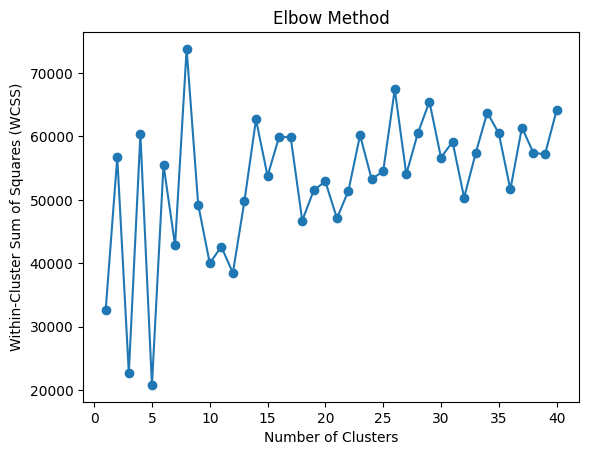

In [44]:
import matplotlib.pyplot as plt

def compute_wcss(X, centroids, labels):
    """
    Compute the within-cluster sum of squares (WCSS).
    
    Parameters:
    - X: Data matrix.
    - centroids: Cluster centroids.
    - labels: Cluster labels for each data point.
    
    Returns:
    - wcss: Within-cluster sum of squares.
    """
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        cluster_wcss = np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
        wcss += cluster_wcss
    return wcss

# Perform clustering on the reconstructed matrix
# For example, let's use KMeans clustering
def kmeans(X, k, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return labels, centroids

def elbow_method(X, max_clusters=10, max_iters=100):
    """
    Implement the elbow method to find the optimal number of clusters.
    
    Parameters:
    - X: Data matrix.
    - max_clusters: Maximum number of clusters to try.
    - max_iters: Maximum number of iterations for KMeans.
    
    Returns:
    - wcss_values: List of within-cluster sum of squares for each value of k.
    """
    wcss_values = []
    for k in range(1, max_clusters + 1):
        _, centroids = kmeans(X, k, max_iters)
        labels, _ = kmeans(X, k, max_iters)
        wcss = compute_wcss(X, centroids, labels)
        wcss_values.append(wcss)
    return wcss_values

# Assuming you have a reconstructed matrix named 'reconstructed_matrix'
max_clusters = 40  # You can adjust this value as needed
wcss_values = elbow_method(reconstructed_matrix, max_clusters)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [45]:


# Assuming you want to cluster users based on their ratings
num_clusters = 5  # You can adjust the number of clusters as needed
cluster_labels, centroids = kmeans(reconstructed_matrix, num_clusters)

# Now cluster_labels contains the cluster assignments for each user
print(cluster_labels)

[4 2 2 ... 2 4 0]


In [ ]:
centroids.shape

In [ ]:
movies_df

In [46]:
# List of MovieIDs to filter
movie_ids_to_filter = [1193, 661, 914, 3408, 2355]

# Filter movies_df based on MovieID
filtered_movies_df = movies_df[movies_df['MovieID'].isin(movie_ids_to_filter)]

In [ ]:
filtered_movies_df

In [ ]:
ratings_df

In [47]:
import pandas as pd

# Function to take input for a single movie
def input_movie():
    genre = input("Enter the genre of the movie: ")
    title = input("Enter the title of the movie: ")
    rating = float(input("Enter the rating of the movie: "))
    return genre, title, rating

# Take input for the number of movies
x = int(input("Enter the number of movies: "))

# Initialize empty lists to store data
genres = []
titles = []
ratings = []

# Take input for each movie
for _ in range(x):
    genre, title, rating = input_movie()
    genres.append(genre)
    titles.append(title)
    ratings.append(rating)

# Create a DataFrame
data = {'Genre': genres, 'Title': titles, 'Rating': ratings}
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


Enter the number of movies:  5
Enter the genre of the movie:  Action|Sci-Fi|Thriller
Enter the title of the movie:  Matrix, The (1999)
Enter the rating of the movie:  5
Enter the genre of the movie:  Action|Drama|War
Enter the title of the movie:  Saving Private Ryan (1998)
Enter the rating of the movie:  5
Enter the genre of the movie:  Action|Drama|War
Enter the title of the movie:  Braveheart (1995)
Enter the rating of the movie:  5
Enter the genre of the movie:  Action|Sci-Fi|Thriller
Enter the title of the movie:  Terminator 2: Judgment Day (1991)
Enter the rating of the movie:  5
Enter the genre of the movie:  Action|Adventure|Sci-Fi
Enter the title of the movie:  Jurassic Park (1993)
Enter the rating of the movie:  5


                     Genre                              Title  Rating
0   Action|Sci-Fi|Thriller                 Matrix, The (1999)     5.0
1         Action|Drama|War         Saving Private Ryan (1998)     5.0
2         Action|Drama|War                  Braveheart (1995)     5.0
3   Action|Sci-Fi|Thriller  Terminator 2: Judgment Day (1991)     5.0
4  Action|Adventure|Sci-Fi               Jurassic Park (1993)     5.0


In [48]:
# Split the 'Genres' column into individual genres
splitgenres = df['Genre'].str.split('|', expand=True)

# Get unique genres
genres_string = "Animation\tChildren's\tComedy\tAdventure\tFantasy\tRomance\tDrama\tAction\tCrime\tThriller\tHorror\tSci-Fi\tDocumentary\tWar\tMusical\tMystery\tFilm-Noir\tWestern"
unique_genres = [genre.strip() for genre in genres_string.split('\t')]

# Create new columns for each genre and mark them with 1 if the movie belongs to that genre
for genre in unique_genres:
    df[genre] = splitgenres.apply(lambda row: 1 if genre in row.values else 0, axis=1)

# Drop the original 'Genres' column
df.drop('Genre', axis=1, inplace=True)

In [ ]:
df

In [49]:
# Get the 'Rating' column
rating_values = df['Rating'].values.reshape(-1, 1)

# Multiply each entry in columns 4 till the end by the 'Rating' value
df.iloc[:, 2:] *= rating_values

/tmp/ipykernel_13/1984654077.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Animation, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] *= rating_values
/tmp/ipykernel_13/1984654077.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Children's, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 2:] *= rating_values
/tmp/ipykernel_13/1984654077.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Comedy, dtype: float64' has dtype incompatible with int64, please explicitly cast to a comp

In [50]:
df

,Title,Rating,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,"Matrix, The (1999)",5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Saving Private Ryan (1998),5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,Braveheart (1995),5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
3,Terminator 2: Judgment Day (1991),5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jurassic Park (1993),5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# Group the dataframe by user ID
grouped_df = df

# Get the list of all genre columns
genre_columns = [col for col in df.columns if col not in ['Title','Rating',]]

def mean_non_zero(series):
    non_zero_values = series[series != 0]
    if non_zero_values.empty:
        return 0
    return non_zero_values.mean()

# Define the aggregation functions dynamically for all genre columns
aggregation_functions = {genre: mean_non_zero for genre in genre_columns}

In [52]:
aggregated_df = grouped_df.agg(aggregation_functions)

In [53]:
aggregated_df

Animation      0.0
Children's     0.0
Comedy         0.0
Adventure      5.0
Fantasy        0.0
Romance        0.0
Drama          5.0
Action         5.0
Crime          0.0
Thriller       5.0
Horror         0.0
Sci-Fi         5.0
Documentary    0.0
War            5.0
Musical        0.0
Mystery        0.0
Film-Noir      0.0
Western        0.0
dtype: float64

In [58]:
aggregated_df = aggregated_df.values

In [59]:
aggregated_df

array([0., 0., 0., 5., 0., 0., 5., 5., 0., 5., 0., 5., 0., 5., 0., 0., 0.,
       0.])

In [54]:
centroids

array([[3.09449219, 2.88429298, 2.89411399, 2.74801743, 2.8475519 ,
        2.93422764, 3.07358492, 2.76030963, 2.97499765, 2.85519969,
        2.4613485 , 2.67507147, 3.29332075, 3.14152293, 3.03778899,
        2.91858552, 3.28895203, 2.90533906],
       [2.39236087, 2.02573256, 2.46196554, 2.29291237, 2.27873998,
        2.54154275, 2.69035253, 2.3729506 , 2.6167439 , 2.5585123 ,
        2.25744865, 2.31207004, 3.07022304, 2.71499771, 2.45278386,
        2.69326855, 3.11242084, 2.46658152],
       [3.44741544, 3.38057899, 3.24132714, 3.25159429, 3.28910623,
        3.27558945, 3.37355676, 3.20891081, 3.25459499, 3.20212012,
        2.86876854, 3.17861315, 3.35192556, 3.49570768, 3.4012012 ,
        3.16266976, 3.40852587, 3.17353451],
       [2.84430336, 2.63508244, 3.12744521, 3.07321069, 2.92637464,
        3.21795494, 3.38462312, 3.2035009 , 3.42744972, 3.38333949,
        3.07673689, 3.1118097 , 3.33512504, 3.5028474 , 2.89891681,
        3.47743053, 3.6112469 , 3.22944068],
    

In [55]:
def assign_to_cluster(point, centroids):
    """
    Assign a point to the nearest cluster centroid based on Euclidean distance.
    
    Parameters:
    - point: 1D numpy array representing the point.
    - centroids: 2D numpy array representing the centroids.
    
    Returns:
    - cluster_index: Index of the nearest cluster.
    """
    # Calculate Euclidean distance between the point and each centroid
    distances = np.linalg.norm(centroids - point, axis=1)
    
    # Find the index of the centroid with the minimum distance
    cluster_index = np.argmin(distances)
    
    return cluster_index

In [60]:
cluster_index = assign_to_cluster(aggregated_df, centroids)

In [61]:
cluster_index

1

In [ ]:
centroids[1]

In [62]:
top_indices = np.argsort(centroids[1])[-3:]

In [63]:
top_indices

array([13, 12, 16])

In [ ]:
movies_df

In [ ]:
ratings_df

In [64]:
# Given list of genres
genres_string = "Animation\tChildren's\tComedy\tAdventure\tFantasy\tRomance\tDrama\tAction\tCrime\tThriller\tHorror\tSci-Fi\tDocumentary\tWar\tMusical\tMystery\tFilm-Noir\tWestern"
genres = [genre.strip() for genre in genres_string.split('\t')]

# Create a new list with the respective top 3 genres
top_genres = [genres[i] for i in top_indices]

In [65]:
top_genres

['War', 'Documentary', 'Film-Noir']

In [72]:
top_geners_merged = 'War'

In [73]:
# Merge ratings_df and movies_df on 'MovieID'
merged_df = pd.merge(ratings_df, movies_df, on='MovieID', how='inner')

In [ ]:
merged_df

In [78]:
# Filter the DataFrame for movies with specified genres
filtered_df = merged_df[merged_df['Genres'] == 'War']

# Sort the filtered DataFrame based on 'Rating' column in descending order
sorted_df = filtered_df.sort_values(by='Rating', ascending=False)

In [79]:
sorted_df

,UserID,MovieID,Rating,Timestamp,Title,Genres
336950,1983,2670,5,974684832,"Run Silent, Run Deep (1958)",War
336947,1983,2669,5,974684708,Pork Chop Hill (1959),War
336221,1980,1927,5,1018299070,All Quiet on the Western Front (1930),War
725471,4344,1927,5,965234708,All Quiet on the Western Front (1930),War
377172,2203,2669,5,974607644,Pork Chop Hill (1959),War
...,...,...,...,...,...,...
734378,4387,1927,1,974824210,All Quiet on the Western Front (1930),War
678182,4064,3066,1,965477434,Tora! Tora! Tora! (1970),War
853102,5114,1927,1,962687123,All Quiet on the Western Front (1930),War
190402,1181,3066,1,976065991,Tora! Tora! Tora! (1970),War


In [80]:
# Get the top 5 unique titles from the sorted DataFrame
top_5_unique_titles = sorted_df['Title'].head(20).unique()

In [81]:
top_5_unique_titles

array(['Run Silent, Run Deep (1958)', 'Pork Chop Hill (1959)',
       'All Quiet on the Western Front (1930)',
       'Tora! Tora! Tora! (1970)', 'Cross of Iron (1977)',
       'Stalingrad (1993)'], dtype=object)